In [405]:
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math

In [406]:
img1 = cv2.imread("/content/Picture1.jpg",cv2.IMREAD_COLOR)
img2 = cv2.imread("/content/Picture2.jpg",cv2.IMREAD_COLOR)
img3 = cv2.imread("/content/Picture3.jpg",cv2.IMREAD_COLOR)
img4 = cv2.imread("/content/Picture4.jpg",cv2.IMREAD_COLOR)
img5 = cv2.imread("/content/Picture5.jpg",cv2.IMREAD_COLOR)
img6 = cv2.imread("/content/Picture6.jpg",cv2.IMREAD_COLOR)
img7 = cv2.imread("/content/Picture7.jpg",cv2.IMREAD_COLOR)
img8 = cv2.imread("/content/Picture8.jpg",cv2.IMREAD_COLOR)
img9 = cv2.imread("/content/Picture9.jpg",cv2.IMREAD_COLOR)
img10 = cv2.imread("/content/Picture10.jpg",cv2.IMREAD_COLOR)
img11 = cv2.imread("/content/Picture11.jpg",cv2.IMREAD_COLOR)

In [407]:
img1 = img1[10:100, 10:100]
img2 = img2[10:100, 10:100]
img3 = img3[10:100, 10:-10]
img4 = img4[10:100, 10:-10]
img5 = img5[10:100, 10:-10]
img6 = img6[10:100, 10:-10]
img7 = img7[10:100, 10:-10]
img8 = img8[10:100, 10:-10]
img9 = img9[5:-5, 5:-5]
img10 = img10[2:-2, 2:-2]
img11 = img11[2:-2, 2:-2]

#### 7.1

In [408]:
def erosion(img, val):
    kernel = np.ones((val, val), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=1)
    cv2_imshow(img)
    cv2_imshow(img_erosion)

In [409]:
def dilation(img, val):
    kernel = np.ones((val, val), np.uint8)
    img_dilation = cv2.dilate(img, kernel, iterations=1)
    cv2_imshow(img)
    cv2_imshow(img_dilation)

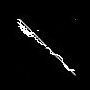

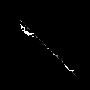

In [410]:
erosion(img1, 2)

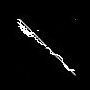

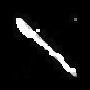

In [411]:
dilation(img1, 3)

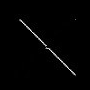

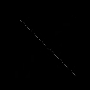

In [412]:
erosion(img2, 2)

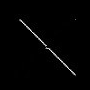

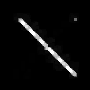

In [413]:
dilation(img2, 3)

#### 7.2

In [414]:
def opening(img, val):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
  # define the kernel
  kernel = np.ones((val, val), np.uint8)
    
  # opening the image
  opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel, iterations=1)
  cv2_imshow(img)
  cv2_imshow(opening)

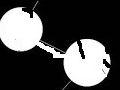

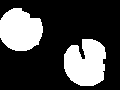

In [415]:
opening(img3, 7)

In [416]:
def closing(img, val):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
  # define the kernel
  kernel = np.ones((val, val), np.uint8)
    
  # closing the image
  closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
  cv2_imshow(img)
  cv2_imshow(closing)

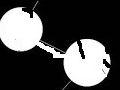

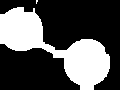

In [417]:
closing(img4, 9)

In [418]:
def opening_closing(img, val1, val2):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  
  # define the kernel
  kernel1 = np.ones((val1, val1), np.uint8)
    
  # opening the image
  opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel1, iterations=1)

  kernel2 = np.ones((val2, val2), np.uint8)
    
  # closing the image
  final = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2, iterations=1)
  cv2_imshow(img)
  cv2_imshow(final)

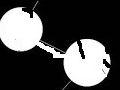

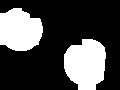

In [419]:
opening_closing(img4, 7, 11)

#### 7.3

In [420]:
def gradient(img, val):
  kernel = np.ones((val, val), np.uint8)
  gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

  cv2_imshow(img)
  cv2_imshow(gradient)

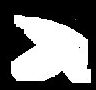

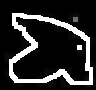

In [421]:
gradient(img5, 5)

#### 7.4

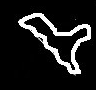

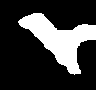

In [422]:
closing(img6, 15)

#### 7.5

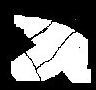

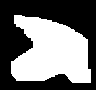

In [423]:
closing(img7, 7)

#### 7.6

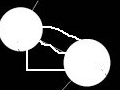

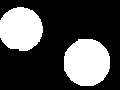

In [424]:
opening(img8, 7)

#### 7.7

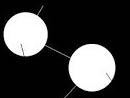

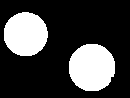

True

In [425]:
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)
binr = cv2.threshold(img9, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

val1 = 5
# define the kernel
kernel1 = np.ones((val1, val1), np.uint8)
  
# opening the image
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel1, iterations=1)

val2 = 5
kernel2 = np.ones((val2, val2), np.uint8)
  
# closing the image
final = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2, iterations=1)
cv2_imshow(img9)
cv2_imshow(final)
cv2.imwrite("/content/img9_preprocessed.jpg", final)

In [426]:
img9_prep = cv2.imread("/content/img9_preprocessed.jpg",cv2.IMREAD_GRAYSCALE)

In [427]:
def count_obj(img):
  blur = cv2.GaussianBlur(img, (11, 11), 0)
  canny = cv2.Canny(blur, 30, 150, 3)
  dilated = cv2.dilate(canny, (1, 1), iterations=0)
    
  (cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  
  cv2_imshow(rgb)  
  print("No. of objects in the image : ", len(cnt))

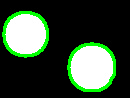

No. of objects in the image :  2


In [428]:
count_obj(img9_prep)

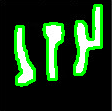

No. of objects in the image :  3


In [429]:
count_obj(img10)

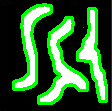

No. of objects in the image :  3


In [430]:
count_obj(img11)